In [84]:
import pandas as pd
import gdown
import os
import gzip
import json
import re
import sys
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

In [2]:
file = open('all_reviews.obj', 'rb') 
reviews = pickle.load(file)
file.close()

In [3]:
file = open('all_books.obj', 'rb') 
books = pickle.load(file)
file.close()

In [4]:
reviews.describe()

,rating,n_votes,n_comments
count,2.389900e+06,2.389900e+06,2.389900e+06
mean,3.764296e+00,1.269322e+00,3.033106e-01
std,1.259770e+00,1.030308e+01,2.460205e+00
min,0.000000e+00,-3.000000e+00,-3.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00
max,5.000000e+00,3.942000e+03,9.220000e+02


In [13]:
reviews.groupby("book_id").count()

,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
book_id,,,,,,,,,,
10000034,1,1,1,1,1,1,1,1,1,1
10000045,1,1,1,1,1,1,1,1,1,1
10000600,23,23,23,23,23,23,23,23,23,23
10000781,1,1,1,1,1,1,1,1,1,1
10000794,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9998891,35,35,35,35,35,35,35,35,35,35
9999403,1,1,1,1,1,1,1,1,1,1
9999637,3,3,3,3,3,3,3,3,3,3


In [16]:
reviews = reviews[reviews['rating']!=0]
len(reviews)

2307723

In [19]:
reviews.groupby("book_id").count()

,user_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
book_id,,,,,,,,,,
10000034,1,1,1,1,1,1,1,1,1,1
10000045,1,1,1,1,1,1,1,1,1,1
10000600,23,23,23,23,23,23,23,23,23,23
10000781,1,1,1,1,1,1,1,1,1,1
10000794,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9998891,35,35,35,35,35,35,35,35,35,35
9999403,1,1,1,1,1,1,1,1,1,1
9999637,3,3,3,3,3,3,3,3,3,3


In [22]:
reviews.groupby('date_added').count()

,user_id,book_id,review_id,rating,review_text,date_updated,read_at,started_at,n_votes,n_comments
date_added,,,,,,,,,,
Fri Apr 01 00:00:15 -0700 2016,1,1,1,1,1,1,1,1,1,1
Fri Apr 01 00:01:27 -0700 2016,1,1,1,1,1,1,1,1,1,1
Fri Apr 01 00:01:40 -0700 2016,1,1,1,1,1,1,1,1,1,1
Fri Apr 01 00:03:28 -0700 2011,1,1,1,1,1,1,1,1,1,1
Fri Apr 01 00:04:42 -0700 2016,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
Wed Sep 30 23:47:32 -0700 2015,1,1,1,1,1,1,1,1,1,1
Wed Sep 30 23:55:38 -0700 2015,1,1,1,1,1,1,1,1,1,1
Wed Sep 30 23:56:48 -0700 2015,1,1,1,1,1,1,1,1,1,1


In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307723 entries, 0 to 2389899
Data columns (total 11 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   book_id       object
 2   review_id     object
 3   rating        int64 
 4   review_text   object
 5   date_added    object
 6   date_updated  object
 7   read_at       object
 8   started_at    object
 9   n_votes       int64 
 10  n_comments    int64 
dtypes: int64(3), object(8)
memory usage: 211.3+ MB


In [104]:
text = reviews['started_at'][0]
text = text[:19]+" "+text[26:30]
text

'Fri Mar 23 00:00:00 2012'

In [136]:
def slice_text(text):
    try:
        text = text[:19]+" "+text[26:30]
        date = datetime.strptime(text, '%c')
        return date
    except:
        return None
    
reviews['t_read_at']= reviews['read_at'].apply(slice_text)
#reviews['t_read_at'] = reviews['t_read_at'].astype('datetime64[ns]')
reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,day_added,month_added,nr_day_added,year_added,rr_month,tdate_added,t_started_at,t_read_at
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25,Wed,Jan,13,2010,1,2010-01-13 13:38:25,2012-03-23 00:00:00,2012-03-25 00:00:00
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,,,0,0,Wed,Jan,21,2015,1,2015-01-21 18:40:59,None,None
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0,Sat,Jan,11,2014,1,2014-01-11 17:58:41,2014-04-11 00:00:00,2014-04-12 00:00:00
3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,0,0,Sun,Apr,21,2013,4,2013-04-21 19:42:28,2013-10-25 00:00:00,2013-10-26 00:00:00
4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,0,0,Fri,Jan,11,2013,1,2013-01-11 11:42:42,2013-01-12 00:00:00,2013-01-14 00:00:00


In [207]:
reviews =reviews.assign(duration = reviews["t_read_at"]-reviews["t_started_at"])

In [195]:
reviews.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,day_added,month_added,nr_day_added,year_added,rr_month,tdate_added,t_started_at,t_read_at,duration
0,8842281e1d1347389f2ab93d60773d4d,2767052,248c011811e945eca861b5c31a549291,5,I cracked and finally picked this up. Very enj...,Wed Jan 13 13:38:25 -0800 2010,Wed Mar 22 11:46:36 -0700 2017,Sun Mar 25 00:00:00 -0700 2012,Fri Mar 23 00:00:00 -0700 2012,24,25,Wed,Jan,13,2010,1,2010-01-13 13:38:25,2012-03-23 00:00:00,2012-03-25 00:00:00,"2 days, 0:00:00"
1,7504b2aee1ecb5b2872d3da381c6c91e,23302416,84c0936a0f9868f38e75d2f9a5cb761e,5,I read this book because my fifth grade son wa...,Wed Jan 21 18:40:59 -0800 2015,Wed Oct 26 03:44:13 -0700 2016,,,0,0,Wed,Jan,21,2015,1,2015-01-21 18:40:59,None,None,NaN
2,f8a89075dc6de14857561522e729f82c,18053080,785c8db878f4009da9741dea51f641da,4,Though the book started out slow and only star...,Sat Jan 11 17:58:41 -0800 2014,Tue Dec 02 11:43:07 -0800 2014,Sat Apr 12 00:00:00 -0700 2014,Fri Apr 11 00:00:00 -0700 2014,0,0,Sat,Jan,11,2014,1,2014-01-11 17:58:41,2014-04-11 00:00:00,2014-04-12 00:00:00,"1 day, 0:00:00"
3,f8a89075dc6de14857561522e729f82c,17383543,34dc3c45d07e82718b05e73167259aef,2,"*Update - 10/27/13* - After some sleep, I thin...",Sun Apr 21 19:42:28 -0700 2013,Fri Aug 15 07:55:01 -0700 2014,Sat Oct 26 00:00:00 -0700 2013,Fri Oct 25 00:00:00 -0700 2013,0,0,Sun,Apr,21,2013,4,2013-04-21 19:42:28,2013-10-25 00:00:00,2013-10-26 00:00:00,"1 day, 0:00:00"
4,f8a89075dc6de14857561522e729f82c,16651458,d8d6b590780256fef7ae4a9550fe3e0d,5,"This is a moving, heartbreaking, view into a l...",Fri Jan 11 11:42:42 -0800 2013,Fri Mar 01 09:31:01 -0800 2013,Mon Jan 14 00:00:00 -0800 2013,Sat Jan 12 00:00:00 -0800 2013,0,0,Fri,Jan,11,2013,1,2013-01-11 11:42:42,2013-01-12 00:00:00,2013-01-14 00:00:00,"2 days, 0:00:00"


In [208]:
def transfrom_to_day(td):
    seconds_in_hour = 60 * 60*24   
    try:
        total_seconds = td.total_seconds()                  
        td_in_hours = total_seconds / seconds_in_hour 
        return td_in_hours
    except:
        return None


    

In [209]:
reviews['duration_d']= reviews['duration'].apply(transfrom_to_day)

In [265]:
users = reviews.groupby("user_id")['review_id'].count()
users.sort_values()[-10:]

user_id
19ff136f47089904d689e69e36c991d0    1026
9003d274774f4c47e62f77600b08ac1d    1027
bb0e63945fc35ac113d004b601f0901b    1061
af9864c9e69963abb963fe2c90dd6f09    1131
1c273b24a02769e228c09f4f9d6dd63b    1139
dc80d6379ba36f99d74bd1e3e26b7d8b    1168
63b0a67080067f05f460c6974d4b3d26    1275
288dc8c9871098c8a1b680db829275b4    1309
aca760854b57ce2ec981df32e46dc96c    1711
59151b639f247aa97fffd5c71701db29    2393
Name: review_id, dtype: int64

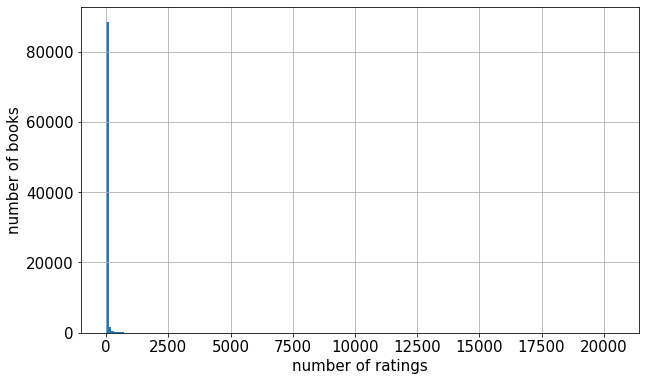

In [284]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
plt.hist(book,bins=200)
plt.ylabel("number of books")
plt.xlabel("number of ratings")
plt.grid()

(array([8.8371e+04, 1.5120e+03, 5.8100e+02, 2.9700e+02, 1.7400e+02,
        1.0100e+02, 8.9000e+01, 5.1000e+01, 6.0000e+01, 3.7000e+01,
        3.1000e+01, 2.9000e+01, 1.7000e+01, 3.0000e+01, 2.0000e+01,
        1.4000e+01, 8.0000e+00, 6.0000e+00, 1.1000e+01, 7.0000e+00,
        9.0000e+00, 1.0000e+01, 8.0000e+00, 9.0000e+00, 6.0000e+00,
        6.0000e+00, 6.0000e+00, 5.0000e+00, 4.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 3.0000e+00, 2.0000e+00, 1.0000e+00, 5.0000e+00,
        1.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00,
        3.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

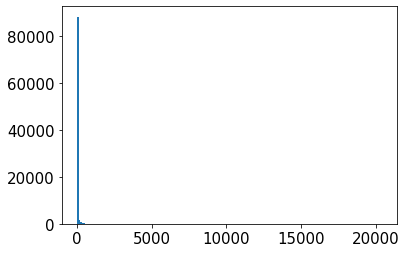

In [285]:
plt.hist(book,bins=200)

In [302]:
book = reviews.groupby("book_id")['review_id'].count()


list(books[books['book_id'].isin(book.sort_values(ascending=False)[:10].index)]["title"])

['Mockingjay (The Hunger Games, #3)',
 'The Hunger Games (The Hunger Games, #1)',
 'Twilight (Twilight, #1)',
 'Catching Fire (The Hunger Games, #2)',
 'Miss Peregrine’s Home for Peculiar Children (Miss Peregrine’s Peculiar Children, #1)',
 'Cinder (The Lunar Chronicles, #1)',
 'The Fault in Our Stars',
 'Eleanor & Park',
 'Insurgent (Divergent, #2)',
 'Divergent (Divergent, #1)']

In [315]:
mean_rating = reviews.groupby("book_id")['rating'].mean()
print(mean_rating)
print(list(book.sort_values(ascending=False)[:10].index))
mean_rating.iloc['11870085']

book_id
10000034    3.000000
10000045    4.000000
10000600    4.217391
10000781    1.000000
10000794    1.000000
              ...   
9998891     3.200000
9999403     4.000000
9999637     4.000000
9999690     4.000000
9999813     3.531250
Name: rating, Length: 91580, dtype: float64
['11870085', '2767052', '7260188', '6148028', '13335037', '41865', '15745753', '11235712', '9460487', '11735983']


TypeError: Cannot index by location index with a non-integer key

In [304]:
list(book.sort_values(ascending=False)[:10])

[20391, 18234, 13233, 11651, 10526, 10131, 9451, 9423, 9349, 9006]

In [301]:
books['ratings_count'] = books['ratings_count'].astype('int')
books.sort_values(by=['ratings_count'],ascending=False)[:10]['title']

20364              The Hunger Games (The Hunger Games, #1)
23127                              Twilight (Twilight, #1)
78226                               The Fault in Our Stars
90540                            Divergent (Divergent, #1)
59587                 Catching Fire (The Hunger Games, #2)
5427                     Mockingjay (The Hunger Games, #3)
35402    The Lightning Thief (Percy Jackson and the Oly...
75764           City of Bones (The Mortal Instruments, #1)
25174                              New Moon (Twilight, #2)
68021                               Eclipse (Twilight, #3)
Name: title, dtype: object

In [228]:
most_active =reviews[reviews['user_id']=='59151b639f247aa97fffd5c71701db29']

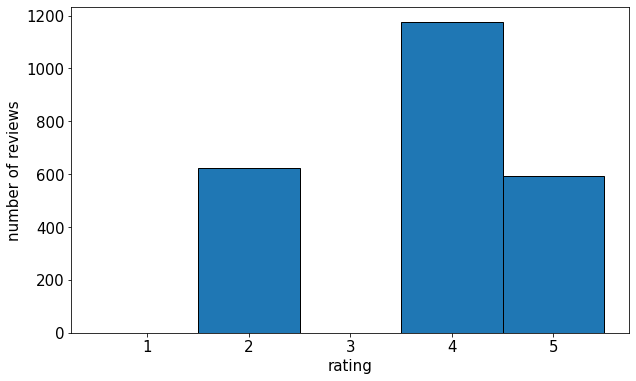

In [268]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
n_bins = 5
n, bins, patches = plt.hist(most_active['rating'], bins=n_bins, edgecolor='black')
ticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
ticklabels = [i+1 for i in range(n_bins)]
plt.ylabel("number of reviews")
plt.xlabel("rating")
plt.xticks(ticks, ticklabels)
plt.show()

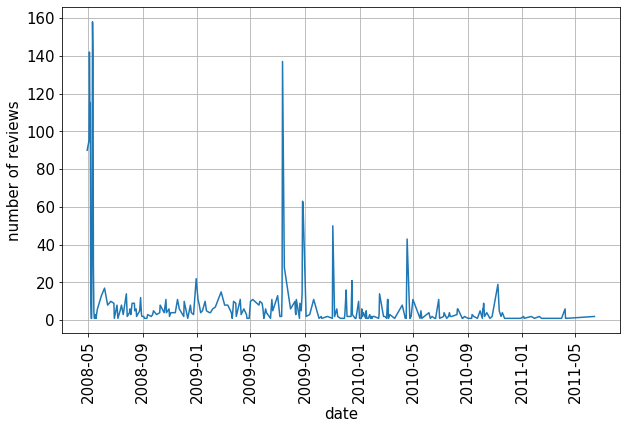

In [261]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
#most_active[['tdate_added']].plot()
most_active.groupby(most_active['tdate_added'].dt.date)['review_id'].count().plot()
plt.xticks(rotation=90)
plt.ylabel("number of reviews")
plt.xlabel("date")
plt.grid()

In [179]:
reviews.groupby(reviews['rating'])['user_id'].count()

rating
1     70229
2    175108
3    475984
4    784116
5    802286
Name: user_id, dtype: int64

In [180]:
802286/70229

11.423856241723504

In [182]:
reviews[reviews['rating']==""]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,day_added,month_added,nr_day_added,year_added,rr_month,tdate_added,t_started_at,t_read_at


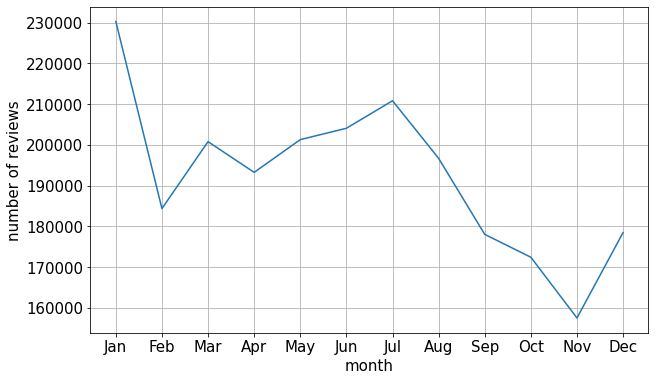

In [161]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
#new_reviews = reviews.dropna(subset=['t_started_at'])
#new_reviews['t_read_at'] = new_reviews['t_read_at'].astype('datetime64[ns]')
reviews.groupby([reviews['tdate_added'].dt.month])['user_id'].count().plot()

plt.ylabel("number of reviews")
plt.xlabel("month")

plt.xticks(np.arange(12)+1, ["Jan", "Feb", "Mar","Apr", "May",'Jun','Jul','Aug','Sep','Oct','Nov',"Dec"])
 
plt.grid()


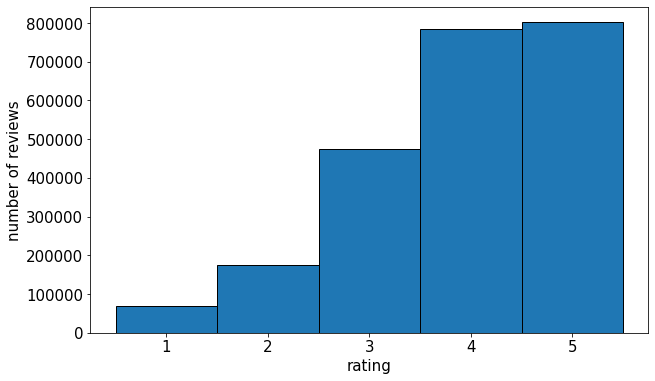

In [178]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
n_bins = 5
n, bins, patches = plt.hist(reviews['rating'], bins=n_bins, edgecolor='black')
ticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
ticklabels = [i+1 for i in range(n_bins)]
plt.ylabel("number of reviews")
plt.xlabel("rating")
plt.xticks(ticks, ticklabels)
plt.show()

In [142]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
reviews.groupby(reviews['year_added'])['user_id'].count().plot()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307723 entries, 0 to 2389899
Data columns (total 19 columns):
 #   Column        Dtype         
---  ------        -----         
 0   user_id       object        
 1   book_id       object        
 2   review_id     object        
 3   rating        int64         
 4   review_text   object        
 5   date_added    object        
 6   date_updated  object        
 7   read_at       object        
 8   started_at    object        
 9   n_votes       int64         
 10  n_comments    int64         
 11  day_added     object        
 12  month_added   object        
 13  nr_day_added  object        
 14  year_added    object        
 15  rr_month      int64         
 16  tdate_added   datetime64[ns]
 17  t_started_at  object        
 18  t_read_at     object        
dtypes: datetime64[ns](1), int64(4), object(14)
memory usage: 352.1+ MB


# Book

In [318]:
books.columns

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series'],
      dtype='object')

Text(0.5, 0, 'Ebook')

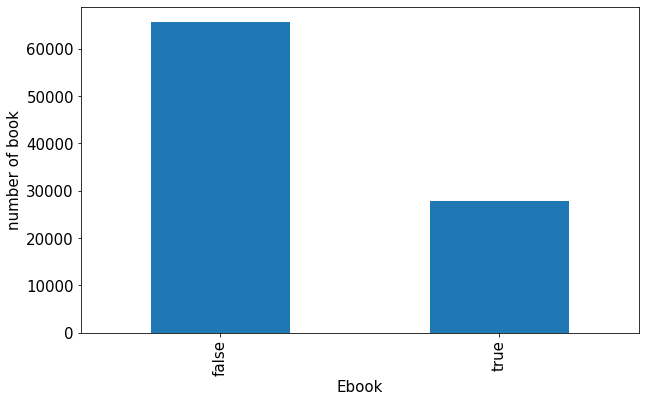

In [324]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
books.groupby("is_ebook")["isbn"].count().plot.bar()
plt.ylabel("number of book")
plt.xlabel("Ebook")

In [ ]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
books.groupby("is_ebook")["isbn"].count().plot.bar()
plt.ylabel("number of book")
plt.xlabel("Ebook")

In [333]:
def get_author(data):
    author =[]
    for i in data:
        if i['role']=="":
            author.append(i['author_id'])
    return author        


In [330]:
books['authors'][0]

[{'author_id': '50873', 'role': ''},
 {'author_id': '232533', 'role': 'Ubersetzer'}]

In [393]:
def change_type(data):
    try:
        data =int(data)
        return data
    except:
        return np.nan
books['publication_year']=books['publication_year'].apply(change_type)

In [337]:
reviews['new_authors']= books['authors'].apply(get_author)

In [339]:
list(reviews['new_authors'])

[['50873'],
 ['5395324'],
 ['7314532'],
 ['293603'],
 ['4018722'],
 ['6537142'],
 ['2760047'],
 ['50873'],
 ['523138'],
 ['539783'],
 ['13850345'],
 ['4982062'],
 ['6455200', '5227552'],
 ['187837'],
 ['2905297', '1144378'],
 ['4864634'],
 ['21911'],
 ['3399621'],
 ['4381377'],
 ['257093'],
 ['14004', '5553612'],
 ['3251728'],
 ['226710'],
 ['25492'],
 ['3486415'],
 ['3486415'],
 ['4397603'],
 ['569269'],
 ['4134859'],
 ['25205'],
 ['14865445'],
 ['5011219'],
 ['5821270', '4807115', '368111', '4459021', '6430546'],
 ['3116117'],
 ['801962'],
 ['8106692'],
 ['7302191'],
 ['15058478'],
 ['1217665', '7506055'],
 ['21701'],
 ['4430'],
 ['1731936'],
 ['72305'],
 ['3130410'],
 ['4309838'],
 ['5831672',
  '4074051',
  '5425858',
  '6921953',
  '546427',
  '7418796',
  '3111338',
  '8347',
  '4039811',
  '7770873',
  '3023658',
  '4600197',
  '6433278',
  '5833089',
  '6571558',
  '5749310'],
 ['161137'],
 ['2740668'],
 ['11466'],
 ['3425627'],
 ['172977'],
 ['172977'],
 ['172977'],
 ['1670544

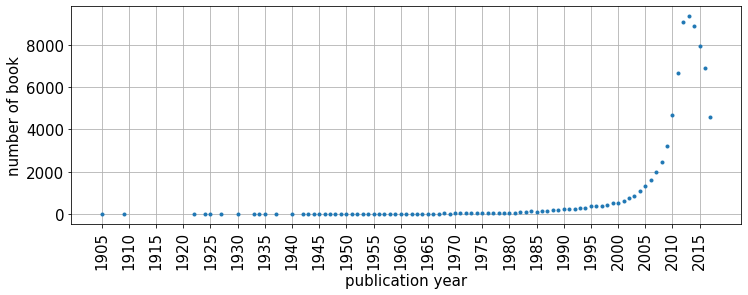

In [408]:
plt.figure(figsize=(12,4))
plt.rcParams.update({'font.size': 15})
pub_year.plot(style=['.'])
plt.ylabel("number of book")
plt.xlabel("publication year")
plt.xticks(np.arange(1905,2020,5),rotation=90)
plt.grid()
plt.show()

In [397]:
pub_year = books.groupby("publication_year")['isbn'].count()
print(pub_year.index)
pub_year = pub_year.loc[(pub_year.index>1800) & (pub_year.index<2018)]
pub_year

Float64Index([    2.0,    12.0,    13.0,    14.0,    15.0,    16.0,    20.0,
                 21.0,    24.0,    28.0,
              ...
               2019.0,  2020.0,  2021.0,  2022.0,  2023.0,  2104.0,  2112.0,
               2994.0, 20017.0, 20045.0],
             dtype='float64', name='publication_year', length=116)


publication_year
1905.0       1
1909.0       1
1922.0       2
1924.0       2
1925.0       1
          ... 
2013.0    9371
2014.0    8914
2015.0    7934
2016.0    6898
2017.0    4602
Name: isbn, Length: 88, dtype: int64

In [432]:

books['has_series']=books['series'].apply(check_series)

([<matplotlib.axis.XTick at 0x7ff41b4f6820>,
 [Text(0, 0, 'Books w/o series'), Text(1, 0, 'Books with series')])

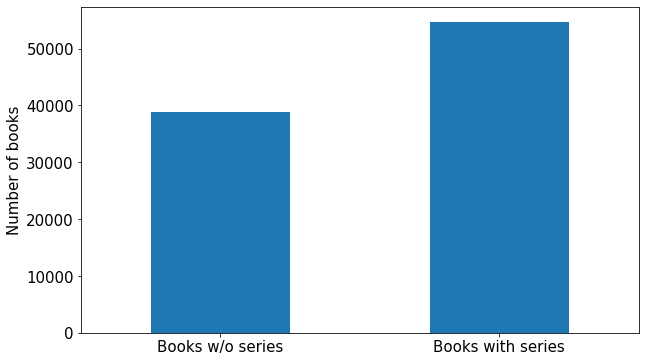

In [443]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
books.groupby('has_series').count()['book_id'].plot(kind='bar')
plt.xlabel("")
plt.ylabel("Number of books")
plt.xticks([0,1],['Books w/o series',"Books with series"],rotation=0)

In [448]:
books['publication_month']

Index(['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code',
       'popular_shelves', 'asin', 'is_ebook', 'average_rating', 'kindle_asin',
       'similar_books', 'description', 'format', 'link', 'authors',
       'publisher', 'num_pages', 'publication_day', 'isbn13',
       'publication_month', 'edition_information', 'publication_year', 'url',
       'image_url', 'book_id', 'ratings_count', 'work_id', 'title',
       'title_without_series', 'has_series'],
      dtype='object')

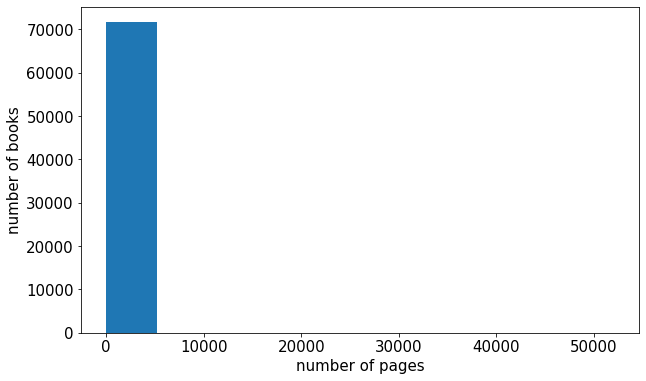

In [466]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
#n_bins = 2000
#n, bins, patches = 
plt.hist(books['num_pages'][:-100])#, bins=n_bins, edgecolor='black')
#ticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
#ticklabels = [i+1 for i in range(n_bins)]
plt.ylabel("number of books")
plt.xlabel("number of pages")
#plt.xticks(ticks, ticklabels)
plt.show()

(array([7.1692e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  5201.5, 10403. , 15604.5, 20806. , 26007.5, 31209. ,
        36410.5, 41612. , 46813.5, 52015. ]),
 <BarContainer object of 10 artists>)

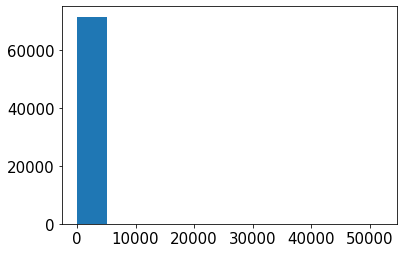

In [468]:
plt.hist(books['num_pages'])

In [474]:
books.sort_values('num_pages',ascending=False)[['title','num_pages']][:20]

,title,num_pages
30508,"Perry's Killer Playlist (Perry & Gobi, #2)",52015.0
45360,An Incredible Girl,6750.0
84528,Stray (Touchstone #1),5923.0
80299,The Complete Private Collection: Private; Invi...,4096.0
44172,The House of Night Series: Books 1-12 (House o...,3920.0
63094,The Princess Diaries Complete Collection (The ...,3296.0
43865,"Gone Series Complete Collection: Gone, Hunger,...",3168.0
25886,The Princess Diaries Boxed Set (The Princess D...,2822.0
83967,Vampire Academy Box Set 1-6,2784.0
72052,Vampire Academy: The Complete Collection: 1/6,2784.0


In [445]:
file = open('selected_reviews.obj', 'rb') 
df = pickle.load(file)
file.close()

In [446]:
len(df)

769333

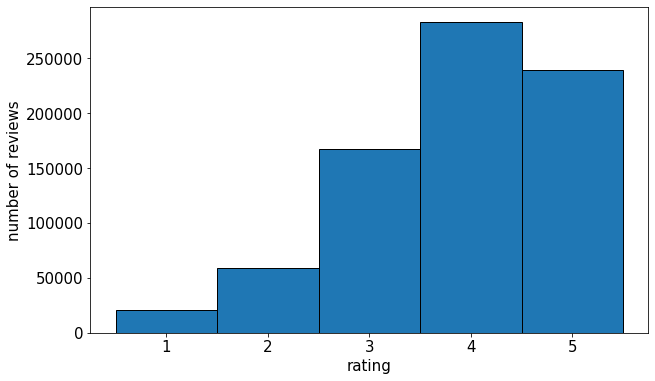

In [478]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
n_bins = 5
n, bins, patches = plt.hist(df['rating'], bins=n_bins, edgecolor='black')
ticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
ticklabels = [i+1 for i in range(n_bins)]
plt.ylabel("number of reviews")
plt.xlabel("rating")
plt.xticks(ticks, ticklabels)
plt.show()

In [486]:
list(books[books['book_id'].isin(df.groupby(['book_id']).count().sort_values('user_id',ascending=False)['rating'][:10].index)]["title"])


['Mockingjay (The Hunger Games, #3)',
 'Fangirl',
 'The Hunger Games (The Hunger Games, #1)',
 'Scarlet (The Lunar Chronicles, #2)',
 'Shadow and Bone (The Grisha, #1)',
 'The Selection (The Selection, #1)',
 'Cinder (The Lunar Chronicles, #1)',
 'The Fault in Our Stars',
 'Insurgent (Divergent, #2)',
 'Cress (The Lunar Chronicles, #3)']

In [488]:
df.groupby(['book_id']).count().sort_values('user_id',ascending=False)['rating'][:10]

book_id
11870085    2734
11235712    2717
11735983    2101
13206760    2070
2767052     2057
10507293    2012
13206828    1949
7260188     1909
10194157    1901
16068905    1899
Name: rating, dtype: int64

In [489]:
file = open('selected_books.obj', 'rb') 
df1 = pickle.load(file)
file.close()

Text(0.5, 0, 'Ebook')

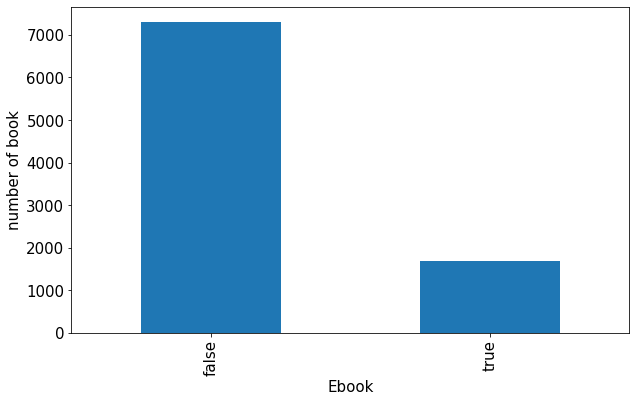

In [490]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
df1.groupby("is_ebook")["isbn"].count().plot.bar()
plt.ylabel("number of book")
plt.xlabel("Ebook")

In [491]:
def check_series(data):
    if len(data)==0:
        return False
    else:
        return True
df1['has_series']=df1['series'].apply(check_series)

([<matplotlib.axis.XTick at 0x7ff3e1f5d040>,
 [Text(0, 0, 'Books w/o series'), Text(1, 0, 'Books with series')])

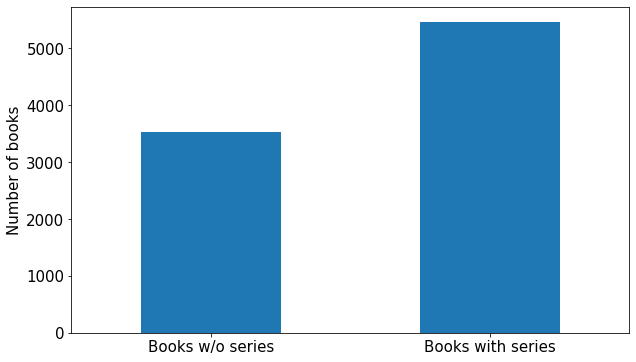

In [492]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 15})
df1.groupby('has_series').count()['book_id'].plot(kind='bar')
plt.xlabel("")
plt.ylabel("Number of books")
plt.xticks([0,1],['Books w/o series',"Books with series"],rotation=0)